## Observations and Insights 

In [ ]:
# Write at least three observations or inferences that can be made from the data.


In [1]:
# Dependencies and Setup
# Import matplotlib for charting
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
pymaceuticals_df = pd.merge(study_results, mouse_metadata, on= "Mouse ID", how = "left")
# Display the data table for preview
pymaceuticals_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
len(pymaceuticals_df["Mouse ID"].unique())

249

In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = pymaceuticals_df.loc[pymaceuticals_df.duplicated(subset = ["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
pymaceuticals_df.loc[pymaceuticals_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pymaceuticals_df.loc[ pymaceuticals_df["Mouse ID"] != "g989" ]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean,
                                   "Median Tumor Volume": median,
                                   "Variance Tumor Volume": variance,
                                   "Standard Deviation Tumor Volume": std,
                                   "SEM Tumor Volume": sem})
summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_2= clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

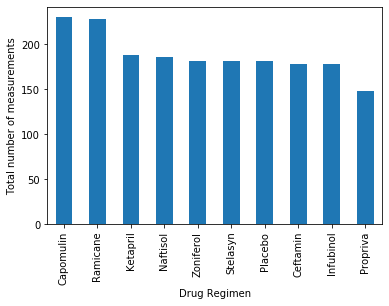

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_drug = clean_df["Drug Regimen"].value_counts()
count_drug.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of measurements")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

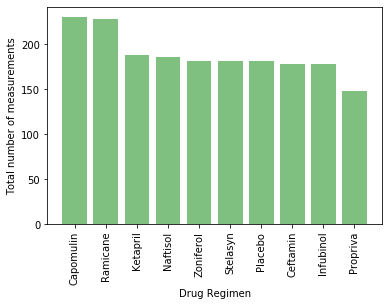

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(count_drug.index.values, count_drug.values, color='g', alpha=0.5, align="center")
plt.xticks(rotation= "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of measurements")
plt.show

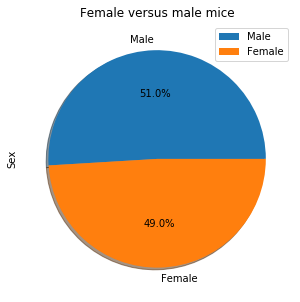

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = clean_df["Sex"].value_counts()
gender_dist.plot( kind = 'pie', figsize=(5,5), autopct="%1.1f%%", shadow = True)

# Set the labels
plt.title("Female versus male mice")
plt.legend()
plt.show()

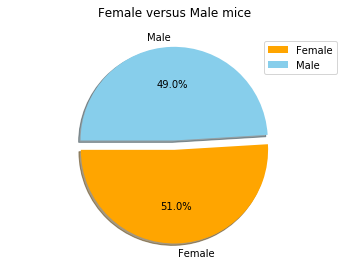

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df["Sex"].unique() 
gender_counts = clean_df["Sex"].value_counts()
colors = ["orange", "skyblue"]
explode = (0.1, 0)
plt.pie(gender_counts, explode = explode, labels=gender, colors = colors,
           autopct="%1.1f%%", shadow = True, startangle = 180)
plt.title("Female versus Male mice", pad = 20)
plt.axis('equal')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [94]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamine_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capo_max = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Rami_max = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Infu_max = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Ceft_max = Ceftamine_df.groupby("Mouse ID").max()["Timepoint"]
# Create the DataFrame
Capo_df = pd.DataFrame(Capo_max)
Rami_df = pd.DataFrame(Rami_max)
Infu_df = pd.DataFrame(Infu_max)
Ceft_df = pd.DataFrame(Ceft_max)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capo_tumor_df = pd.merge(Capo_df, clean_df, on= ("Mouse ID", "Timepoint"), how = "left")
rami_tumor_df = pd.merge(Rami_df, clean_df, on= ("Mouse ID", "Timepoint"), how = "left")
infu_tumor_df = pd.merge(Infu_df, clean_df, on= ("Mouse ID", "Timepoint"), how = "left")
ceft_tumor_df = pd.merge(Ceft_df, clean_df, on= ("Mouse ID", "Timepoint"), how = "left")

In [132]:
# Put treatments into a list for for loop (and later for plot labels) #looping through different drugs and filter data to each drug
volume_list = [capo_tumor_df,rami_tumor_df,infu_tumor_df,ceft_tumor_df]
# Create empty list to fill with tumor vol data (for plotting)
vol_data_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in volume_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    one_regime = x.loc[:,"Tumor Volume (mm3)"] 
    vol_data_list.append(one_regime)
    #add subset 
    quartiles = one_regime.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,3)} could be potential outliers.")
    print(f"Values above {round(upper_bound,3)} could be potential outliers.")
    

Values below 20.705 could be potential outliers.
Values above 51.832 could be potential outliers.
Values below 17.913 could be potential outliers.
Values above 54.307 could be potential outliers.
Values below 36.833 could be potential outliers.
Values above 82.741 could be potential outliers.
Values below 25.355 could be potential outliers.
Values above 87.666 could be potential outliers.


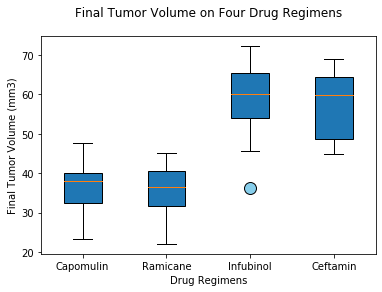

In [134]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume on Four Drug Regimens', pad =20)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimens')
flierprops = dict(marker='o', markerfacecolor='skyblue', markersize=12,
                  markeredgecolor='0')
ax1.boxplot(vol_data_list, flierprops = flierprops, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],
            patch_artist = True)
plt.show()



## Line and Scatter Plots

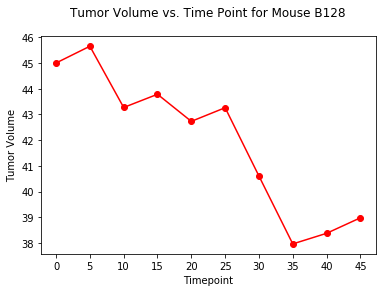

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#The mouse will be: Mouse b128
drug_capo = clean_df.loc[ clean_df["Drug Regimen"] == "Capomulin" ]
capo_b128 = drug_capo.loc[drug_capo['Mouse ID'] == 'b128']
#create DataFrame
dfl=pd.DataFrame({'xvalues': capo_b128['Timepoint'], 'yvalues': capo_b128['Tumor Volume (mm3)'] })
# plot
plt.plot( 'xvalues', 'yvalues', data=dfl, color = 'r', marker = 'o')
plt.title("Tumor Volume vs. Time Point for Mouse B128", pad=20)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.xticks(capo_b128['Timepoint'])
# show the graph
plt.show()


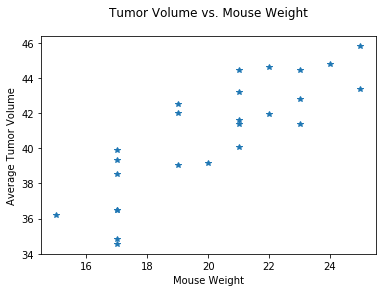

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create a dataset:
capo_id = drug_capo.groupby('Mouse ID').mean()
df=pd.DataFrame({'x_values': capo_id['Weight (g)'], 'y_values': capo_id['Tumor Volume (mm3)'] })
# plot
plt.plot( 'x_values', 'y_values', data=df, linestyle='none', marker='*')
plt.title("Tumor Volume vs. Mouse Weight", pad = 20)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

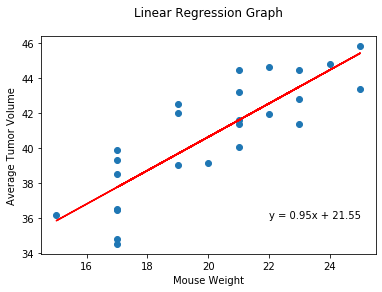

The correlation coefficient is: 0.8419
The r-squared is: 0.7089


In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_id['Weight (g)']
y_values = capo_id['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (22,36))
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title('Linear Regression Graph', pad = 20)
plt.show()
print(f"The correlation coefficient is: {round(rvalue,4)}")
print(f"The r-squared is: {round(rvalue**2,4)}")